In [1]:
from cnn import Turtlebot_CNN
from lstm import Turtlebot_LSTM
from read_data import make_dataset,split_data
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from inception import Inception

batch_size=10
num_epochs=1

ds,l=make_dataset(path='FullData/')


Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


[INFO]  Data folder FullData/NoNoise/49/auto_sending_goals_2021-06-30-10-19-52 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/28/auto_sending_goals_2021-06-29-11-09-13 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/11/auto_sending_goals_2021-06-29-10-30-48 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/43/auto_sending_goals_2021-06-30-10-06-18 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/51/auto_sending_goals_2021-06-30-10-24-23 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/29/auto_sending_goals_2021-06-29-11-11-28 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/59/auto_sending_goals_2021-06-30-10-42-28 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/18/auto_sending_goals_2021-06-29-10-46-37 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/41/auto_sending_goals_2021-06-30-10-03-40 already exists. Not creating.
[INFO]  Data folder

In [2]:
train,test,validation=split_data(ds,l,batch_train=batch_size,prop_train_val=0.8,prop_train=0.8)

In [3]:
inc=Inception()
cb_list_inc=[tf.keras.callbacks.ModelCheckpoint('inc_model/checkpoint_inc_batch{}_epochs{}.h5'.format(batch_size,num_epochs),monitor='val_loss',save_best_only=True,save_weights_only=True)]#tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50),
inc.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])
hist_inc=inc.fit(train,epochs=num_epochs,callbacks=cb_list_inc,verbose=1,validation_data=validation)

12/12 [==============================] - 11s 709ms/step - loss: 1.0514 - categorical_accuracy: 0.5043 - val_loss: 1.0220 - val_categorical_accuracy: 0.5304


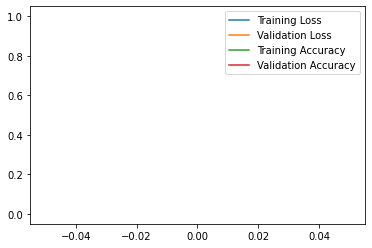

29/29 [==============================] - 0s 7ms/step - loss: 1.0351 - categorical_accuracy: 0.5517


[1.0350993871688843, 0.5517241358757019]

In [4]:
inc.load_weights('inc_model/checkpoint_inc_batch{}_epochs{}.h5'.format(batch_size,num_epochs))
plt.figure()
plt.plot(hist_inc.history['loss'],label='Training Loss')
plt.plot(hist_inc.history['val_loss'],label='Validation Loss')
plt.plot(hist_inc.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(hist_inc.history['val_categorical_accuracy'],label='Validation Accuracy')
plt.legend()
plt.ylim(-0.05,1.05)
plt.show()
inc.evaluate(test)

In [5]:

lstm=Turtlebot_LSTM()
cb_list_lstm=[tf.keras.callbacks.ModelCheckpoint('lstm_model/checkpoint_lstm_batch{}_epochs{}.h5'.format(batch_size,num_epochs),monitor='val_loss',save_best_only=True,save_weights_only=True)]#tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50),
lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])
hist_lstm=lstm.fit(train,epochs=1,callbacks=cb_list_lstm,verbose=1,validation_data=validation)

12/12 [==============================] - 11s 844ms/step - loss: 1.0827 - categorical_accuracy: 0.4435 - val_loss: 1.0491 - val_categorical_accuracy: 0.4783


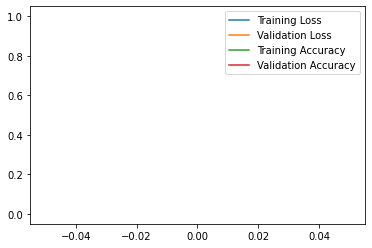

29/29 [==============================] - 3s 111ms/step - loss: 0.1257 - categorical_accuracy: 0.9310


[0.12567266821861267, 0.931034505367279]

In [6]:
lstm.load_weights('lstm_model/checkpoint_lstm_best.h5'.format(batch_size,num_epochs))
plt.figure()
plt.plot(hist_lstm.history['loss'],label='Training Loss')
plt.plot(hist_lstm.history['val_loss'],label='Validation Loss')
plt.plot(hist_lstm.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(hist_lstm.history['val_categorical_accuracy'],label='Validation Accuracy')
plt.legend()
plt.ylim(-0.05,1.05)
plt.show()
lstm.evaluate(test)

In [7]:
cnn=Turtlebot_CNN()
cb_list_cnn=[tf.keras.callbacks.ModelCheckpoint('cnn_model/checkpoint_cnn_batch{}_epochs{}.h5'.format(batch_size,num_epochs),monitor='val_loss',save_best_only=True,save_weights_only=True)]#,tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50)]
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])
hist_cnn=cnn.fit(train,epochs=1,callbacks=cb_list_cnn,verbose=1,validation_data=validation)
cnn.summary()

12/12 [==============================] - 2s 101ms/step - loss: 1.0308 - categorical_accuracy: 0.4348 - val_loss: 0.9720 - val_categorical_accuracy: 0.4957
Model: "turtlebot_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_64 (Conv1D)           multiple                  8320      
_________________________________________________________________
conv1d_65 (Conv1D)           multiple                  230400    
_________________________________________________________________
conv1d_66 (Conv1D)           multiple                  20480     
_________________________________________________________________
conv1d_67 (Conv1D)           multiple                  20480     
_________________________________________________________________
global_average_pooling1d_2 ( multiple                  0         
_________________________________________________________________
global_average_pooling1d_3 ( m

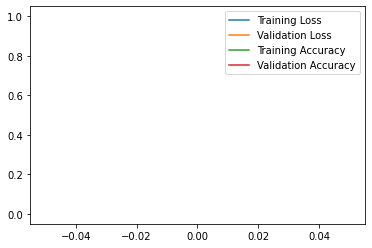

29/29 [==============================] - 0s 3ms/step - loss: 0.9628 - categorical_accuracy: 0.4828


[0.9627757668495178, 0.48275861144065857]

In [8]:
cnn.load_weights('cnn_model/checkpoint_cnn_batch{}_epochs{}.h5'.format(batch_size,num_epochs))

plt.figure()
plt.plot(hist_cnn.history['loss'],label='Training Loss')
plt.plot(hist_cnn.history['val_loss'],label='Validation Loss')
plt.plot(hist_cnn.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(hist_cnn.history['val_categorical_accuracy'],label='Validation Accuracy')
plt.legend()
plt.ylim(-0.05,1.05)
plt.show()
cnn.evaluate(test)

In [9]:
lstm.predict(test)

array([[2.0624520e-03, 5.0602873e-18, 9.9793756e-01],
       [4.8924698e-11, 9.9999535e-01, 4.6694277e-06],
       [4.7347751e-01, 2.2617690e-04, 5.2629626e-01],
       [1.1269168e-12, 9.9999988e-01, 6.6302668e-08],
       [5.8571535e-01, 1.8212825e-04, 4.1410258e-01],
       [1.5986145e-05, 3.6713347e-05, 9.9994731e-01],
       [5.2824050e-01, 5.9137784e-04, 4.7116816e-01],
       [5.7301223e-01, 2.7809152e-03, 4.2420682e-01],
       [4.7094816e-01, 2.8822834e-03, 5.2616960e-01],
       [2.8906055e-04, 9.9864560e-01, 1.0654123e-03],
       [2.1215870e-05, 2.3338927e-05, 9.9995542e-01],
       [8.9948000e-05, 6.5262420e-11, 9.9991000e-01],
       [1.2243039e-03, 9.9592364e-01, 2.8521132e-03],
       [2.7680034e-03, 5.2602790e-08, 9.9723190e-01],
       [3.8800989e-09, 9.9999976e-01, 1.8076052e-07],
       [9.8904335e-01, 6.8231129e-05, 1.0888320e-02],
       [9.9207896e-01, 6.9409092e-05, 7.8516351e-03],
       [6.5180403e-01, 6.4264052e-09, 3.4819594e-01],
       [1.1270672e-12, 9.999